Pilih dataset yang ingin digunakan
1. Iris dataset
2. Breast Cancer dataset
3. Wine dataset
Masukkan angka 1-3: 1
1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)
Masukkan nomor untuk kolom atribut-x: 1
Maskkan nomor untuk kolom atribut-y: 2


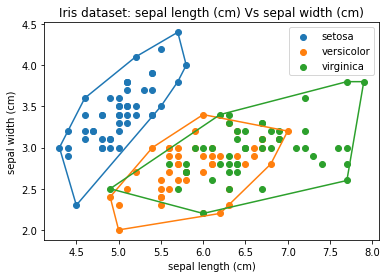

In [1]:
# Fungsi - fungsi pembentuk convexHull

import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets


data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.DataFrame(data.target)
labels = data.target_names
column_name = data.feature_names
solution = []


def quickSortPartition(arrayAbsis, low, high):
    i = low - 1;
    pivot = arrayAbsis[high][0]

    # loop untuk melakukan partisi pada array
    for j in range(low, high):
        if arrayAbsis[j][0] < pivot:
            # increment nilai i untuk melakukan penukaran
            i = i + 1
            arrayAbsis[i], arrayAbsis[j] = arrayAbsis[j], arrayAbsis[i]

    # memastikan bahwa niali pivot berada di tengah
    arrayAbsis[i + 1], arrayAbsis[high] = arrayAbsis[high], arrayAbsis[i + 1]

    # mengembalikan nilai indeks pivot / indeks dimana array sudah terurut
    return i + 1


def quickSort(arrayAbsis, low, high):
    if len(arrayAbsis) == 1:
        return arrayAbsis
    if low < high:
        pi = quickSortPartition(arrayAbsis, low, high)

        quickSort(arrayAbsis, low, pi - 1)
        quickSort(arrayAbsis, pi + 1, high)

    # return sorted array


def findPointDistance(p1, p2):
    x_distance = p1[0] - p2[0]
    y_distance = p1[1] - p2[1]

    return math.sqrt((x_distance ** 2) + (y_distance ** 2))


def findRightMostPoint(pointArray):
    # asumsi array selalu terurut
    return pointArray[-1]


def findLeftMostPoint(pointArray):
    # asumsi array selalu terurut
    return pointArray[0]


def getYBoundary(p1, p2):
    # untuk memisahkan titik menjadi dua bagian antara (atas/bawah)
    y1 = p1[1]
    y2 = p2[2]

    return min(y1, y2)


def getCoordinateSide(A, B, p):
    # AB --> Garis, p--> koordinat
    x1, y1 = A[0], A[1]
    x2, y2 = B[0], B[1]

    x, y = p[0], p[1]

    # menyusun persamaan garis dari kedua point A dan B
    a = y2 - y1
    b = x1 - x2
    c = x2 * y1 - x1 * y2

    f = a * x + b * y + c

    # Memeriksa jika point p berada di bawah/atas garis
    if f < 0:
        return 'above'
    elif f > 0:
        return 'below'
    else:
        return 'on line'


def findHull(pointArray, A, B):
    if len(pointArray) == 0:
        return
    else:
        x1, y1 = A[0], A[1]
        x2, y2 = B[0], B[1]

        # membuat persamaan garis dengan bentuk:
        # ax + by + c = 0

        a = y2 - y1
        b = x1 - x2
        c = x2 * y1 - x1 * y2

        farthestDistance = -1


        # proses mencari titik dengan jarak paling jauh
        C = [0 for i in range(2)]
        for point in pointArray:
            x, y = point[0], point[1]
            f = abs(a * x + b * y + c)
            if f > farthestDistance:
                farthestDistance = f
                C[0], C[1] = x, y


        # update array solution agar terisi garis yang paling baru
        solution.remove([A, B])
        solution.append([A, C])
        solution.append([C, B])

        # menghilangkan koordinat dari pointArray agar tidak digunakan lagi
        pointArray.remove(C)

        # memisahkan sisa koordinat menjadi kiri dan kanan
        rightCoordinate = []
        leftCoordinate = []

        for point in pointArray:
            if (getCoordinateSide(A, C, point) == 'above'):
                rightCoordinate.append(point)

        for point in pointArray:
            if (getCoordinateSide(C, B, point) == 'above'):
                leftCoordinate.append(point)

        findHull(rightCoordinate, A, C)
        findHull(leftCoordinate, C, B)


# Main convexHull function
def convexHull(pointArray):
    # Sort array berdasarkan absis
    # Jika absis sama, berdasarkan ordinat
    pointArray = sorted(pointArray, key=lambda k: [k[0], k[1]])

    A = findLeftMostPoint(pointArray)
    B = findRightMostPoint(pointArray)

    # membagi koordinat menjadi 2 array atas/bawah
    topHalf = []
    lowHalf = []


    for point in pointArray:
        if (getCoordinateSide(A, B, point) == 'above'):
            topHalf.append(point)
        elif (getCoordinateSide(A, B, point) == 'below'):
            lowHalf.append(point)
        else:
            pass

    solution.append([A, B])
    solution.append([B, A])

    # divide and conquer
    findHull(topHalf, A, B)
    findHull(lowHalf, B, A)


# Sort the solution array
# Hal ini diperlukan agar koordinat bisa di plot dengan sesuai
def sortSolution(solutionArr):
  n = len(solutionArr)

  for i in range(0,n):
    line = solutionArr[i]
    next_line_idx = min(i+1, n-1)
    next_line = solution[next_line_idx]

    # Jika urutan pada data tidak sesuai lakukan penukaran posisi koordinat
    if (line[1] != next_line[0]):
        Pass = next_line_idx
        next_line = solution[Pass]
        while Pass < n-1 and (line[1] != next_line[0]):
            Pass += 1
            next_line = solution[Pass]

        solutionArr[next_line_idx], solutionArr[Pass] = solutionArr[Pass], solutionArr[next_line_idx]


if __name__ == '__main__':
    print('Pilih dataset yang ingin digunakan')
    print('1. Iris dataset')
    print('2. Breast Cancer dataset')
    print('3. Wine dataset')
    dataset = int(input('Masukkan angka 1-3: '))

    x_value = 0
    y_value = 0

    Title = ""
    if dataset == 1:
        data = datasets.load_iris()
        Title += "Iris dataset: "
    elif dataset == 2:
        Title += "Diabetes dataset: "
    elif dataset == 3:
        data = datasets.load_wine()
        Title += "Wine dataset: "



    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = pd.DataFrame(data.target)
    labels = data.target_names
    column_name = data.feature_names
    solution = []

    for j in range(len(column_name)):
        print(f'{j+1}. {column_name[j]}')

    x_value = int(input('Masukkan nomor untuk kolom atribut-x: '))
    y_value = int(input('Maskkan nomor untuk kolom atribut-y: '))

    Title += column_name[x_value-1] + " Vs " + column_name[y_value-1]

    for i in range(len(labels)):
        # mengambil data untuk setiap fitur (target)
        data_new = df[df['target'] == i]

        #array solution yang akan digunakan
        solution = []
        plt.scatter(data_new[column_name[x_value-1]], data_new[column_name[y_value-1]],label=labels[i])
        plt.title(Title)
        plt.xlabel(column_name[x_value-1])
        plt.ylabel(column_name[y_value-1])
        plt.legend()
        data_new = data_new[[column_name[x_value-1], column_name[y_value-1]]].values.tolist()
        convexHull(data_new)
        # sort solution
        sortSolution(solution)

        # menyesuaikan format dari himpunan solusi agar bisa di tampilkan
        hull = []
        for line in solution:
            hull.append(line[0])
            hull.append(line[1])

        # menampilkan hasil convexHull
        df_solution = pd.DataFrame(hull, columns=['x', 'y'])
        plt.plot(df_solution['x'], df_solution['y'])


    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')